<a href="https://colab.research.google.com/github/Anweshasen98/Image-Classification-on-the-MNIST-Handwritten-Digits-Recognition-Dataset/blob/main/Model_B_MNIST_by_CNN_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model B MNIST Classification using CNN**

In [ ]:
#IMPORT DEPENDENCIES

import tensorflow as tf
from tensorflow import keras

from sklearn import metrics
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [ ]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
#NORMALIZING INPUT DATA

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
#CALLBACK
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy")> ACCURACY_THRESHOLD):
      print("\nReached %2.2f%% accuracy so cancelling training!" % (ACCURACY_THRESHOLD*100))
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:
# USE AT LEAST 3 CONVOLUTION LAYERS (with Max Pooling)

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(20, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(30, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(60, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.20),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 30)        5430      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 30)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 60)          16260     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 60)         0

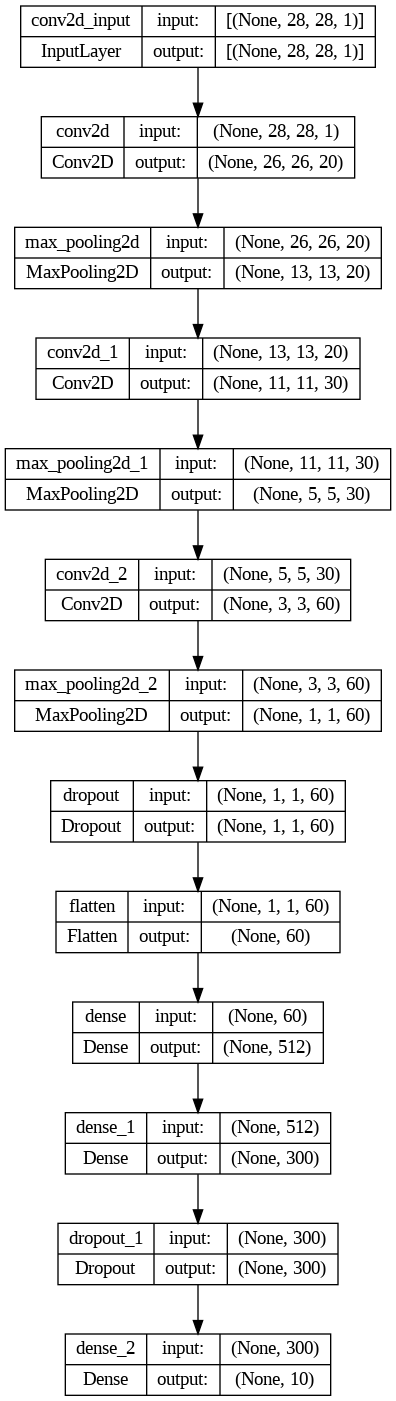

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model,'model.png', show_shapes=True, show_layer_names=True)

In [ ]:
#optimizer=Adam(learning_rate=.0001)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
ACCURACY_THRESHOLD =  .99

training = model.fit(X_train, y_train, epochs=100, batch_size= 32 , validation_split=0.1, callbacks=[callbacks])

Epoch 1/100
1688/1688 [==============================] - 18s 4ms/step - loss: 0.3347 - accuracy: 0.8948 - val_loss: 0.0956 - val_accuracy: 0.9715
Epoch 2/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1252 - accuracy: 0.9628 - val_loss: 0.0613 - val_accuracy: 0.9815
Epoch 3/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1026 - accuracy: 0.9704 - val_loss: 0.0769 - val_accuracy: 0.9777
Epoch 4/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0851 - accuracy: 0.9756 - val_loss: 0.0531 - val_accuracy: 0.9843
Epoch 5/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0740 - accuracy: 0.9782 - val_loss: 0.0549 - val_accuracy: 0.9837
Epoch 6/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0656 - accuracy: 0.9808 - val_loss: 0.0439 - val_accuracy: 0.9880
Epoch 7/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0601 - accuracy: 0.9819 - val_loss: 0.0609 - val_a

Task 1b. Performance Evaluation

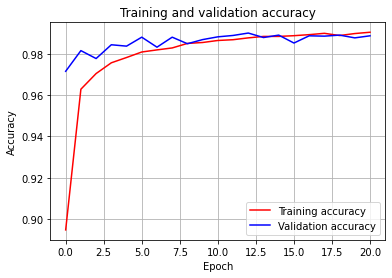

<Figure size 432x288 with 0 Axes>

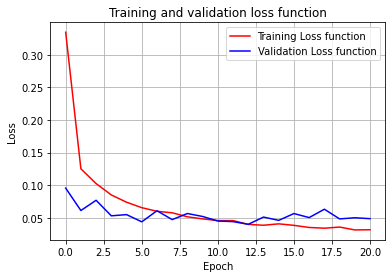

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Training and Testing curves

import matplotlib.pyplot as plt

history = training.history

def summarize_diagnostics(history):
  acc = history['accuracy']
  loss = history['loss']
  val_acc = history['val_accuracy']
  val_loss = history['val_loss']

  epochs = range(len(acc))


  plt.grid()
  plt.plot(acc, 'r', label='Training accuracy')
  plt.plot(val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.figure()
  plt.show()

  plt.grid()
  plt.plot(loss, 'r', label='Training Loss function')
  plt.plot(val_loss, 'b', label='Validation Loss function')
  plt.title('Training and validation loss function')
  plt.legend(loc=0)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.figure()
  plt.show()


summarize_diagnostics(history)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss : {loss}, \nAccuracy: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0546 - accuracy: 0.9871
Loss : 0.05455954000353813, 
Accuracy: 0.9871000051498413


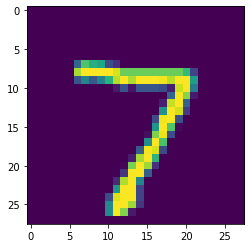

In [ ]:
plt.imshow(X_test[0])

In [ ]:
#PREDICT

classification = model.predict(X_test)
classification[0]

313/313 [==============================] - 1s 2ms/step


array([1.12841815e-27, 2.23117672e-21, 4.91634756e-18, 4.86323813e-20,
       1.23545024e-26, 2.87027612e-24, 0.00000000e+00, 1.00000000e+00,
       1.10189050e-29, 8.41906108e-20], dtype=float32)

In [ ]:
np.argmax(classification[0])

7

In [ ]:
y_pred = []

for i in classification:
    y_pred.append(np.argmax(i))

y_pred[:5]

[7, 2, 1, 0, 4]

In [ ]:
pred=[np.argmax(i) for i in classification]

pred[ :5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(y_test, pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    0,    5,    1,    1,    6,    0,    0],
       [   0, 1132,    1,    0,    0,    0,    0,    2,    0,    0],
       [   3,    2, 1003,    4,    1,    0,    2,   16,    1,    0],
       [   0,    0,    1,  997,    0,    5,    0,    6,    1,    0],
       [   0,    0,    0,    0,  976,    0,    1,    1,    0,    4],
       [   2,    0,    0,    5,    0,  880,    3,    2,    0,    0],
       [   4,    2,    0,    0,    3,    1,  946,    0,    2,    0],
       [   1,    4,    4,    0,    1,    2,    0, 1015,    0,    1],
       [   0,    0,    1,    2,    2,    0,    0,    0,  965,    4],
       [   2,    1,    1,    0,    2,    5,    0,    3,    4,  991]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

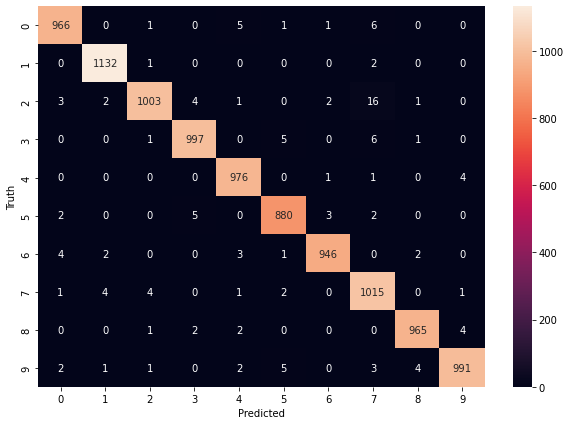

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

End of Task 1a Model B: MNIST Classifier Using CNN